<a href="https://colab.research.google.com/github/Knowasiak/A2_World_Region_Analysis/blob/main/Script%2004%20-%20The%20Model%20Building%20Framework%20-%20Guided.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [22]:
# cloning GitHub Repo
!git clone https://github.com/chase-kusterer/BASD.git

# changing directory
import os
repo_name = '/content/BASD/'
os.chdir(repo_name)

# checking results
print(f"Current working directory changed to: {os.getcwd()}")

Cloning into 'BASD'...
remote: Enumerating objects: 53, done.
remote: Counting objects: 100% (53/53), done.
remote: Compressing objects: 100% (43/43), done.
remote: Total 53 (delta 15), reused 38 (delta 9), pack-reused 0 (from 0)
Receiving objects: 100% (53/53), 5.20 MiB | 13.31 MiB/s, done.
Resolving deltas: 100% (15/15), done.
Current working directory changed to: /content/BASD


<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

<br><h1>The Model Building Framework</h1>
DAT-7470 - Business Analysis with Structured Data<br>
Sample Solution<br><br>

Written by Chase Kusterer - Faculty of Analytics <br>
Hult International Business School <br>
<a href="https://chase-kusterer.github.io/">https://chase-kusterer.github.io/</a> <br><br><br><br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />

Our previous model building endeavors had one major drawback:<br><br>

<div align="center"><h4>The models were trained using all of the data.</h4></div><br>

This may not seem like a big deal, but modeling in this way can be very dangerous. Allowing an algorithm to see all of the data runs the risk of <strong>overfitting</strong>, or tailoring so closely to a dataset that the algorithm predicts poorly on new observations. Remember, the primary goal of building a model is to predict well on observations where the end result is unknown (i.e., new cases). Therefore, we need to set aside a some data before a model is trained (known as a <strong>testing</strong> or <strong>validation set</strong>). After training, the testing set will help us understand how the model predicts on new data.<br><br><br>
<strong>Some Things to Keep in Mind</strong><br>
1. Data exploration and feature engineering are always conducted on the full dataset.
2. Model adjustments should never be made on the testing set. The testing set should only be used to analyze a model's fit.<br>

<h4>Imports and Loading the Dataset</h4>
Run the following code to import packages and the feature-enhanced version of the dataset.

In [23]:
# importing packages
import pandas as pd                                  # data science essentials
import matplotlib.pyplot as plt                      # data viz
import seaborn as sns                                # enhanced data viz
import statsmodels.formula.api as smf                # linear modeling
from sklearn.model_selection import train_test_split # train/test split
import sklearn.linear_model                          # faster linear modeling
import numpy as np                                   # mathematical essentials


# specifying the path and file name
file = './datasets/diamonds.xlsx'


# converting data types with a dictionary
data_types = {"channel" : str,
              "store"   : str}


# reading the file into Python
diamonds = pd.read_excel(io      = file,
                         dtype   = data_types,
                         usecols = range(1, 8)) # omitting Obs


# checking the file
diamonds.head(n = 5)

,carat,color,clarity,cut,channel,store,price
0,0.32,3,7,0,0,7,1375
1,0.35,5,7,1,0,7,1680
2,0.40,4,7,1,0,7,2245
3,0.59,5,7,0,0,3,2495
4,0.72,7,8,0,0,8,2699


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part I: Preparing Categorical Data</h2><br>
Categorical features need to be converted into a series of yes or no questions, more formally known as <strong>binary matrix factorization</strong>. Also, one category needs to be removed to avoid issues with autocorrelation (the <em>k-1</em> rule). Note that we are intentionally omitting <em>store</em> in this part of the analysis as some retailers did not have sufficient sample sizes for stable vizualizations or model building.
<br><br>
Run the code below to instantiate the <em>categorical_boxplots</em> user-defined function.

In [24]:
# defining a function for categorical boxplots
def categorical_boxplots(response, cat_var, data):
    """
	This function is designed to generate a boxplot for  can be used for categorical variables.
    Make sure matplotlib.pyplot and seaborn have been imported (as plt and sns).

    PARAMETERS
	----------
	response : str, response variable
	cat_var  : str, categorical variable
	data     : DataFrame of the response and categorical variables
	"""

    fig, ax = plt.subplots(figsize = (10, 8))

    sns.boxplot(x    = response,
                y    = cat_var,
                data = data)

    plt.suptitle("")
    plt.show()

<br>

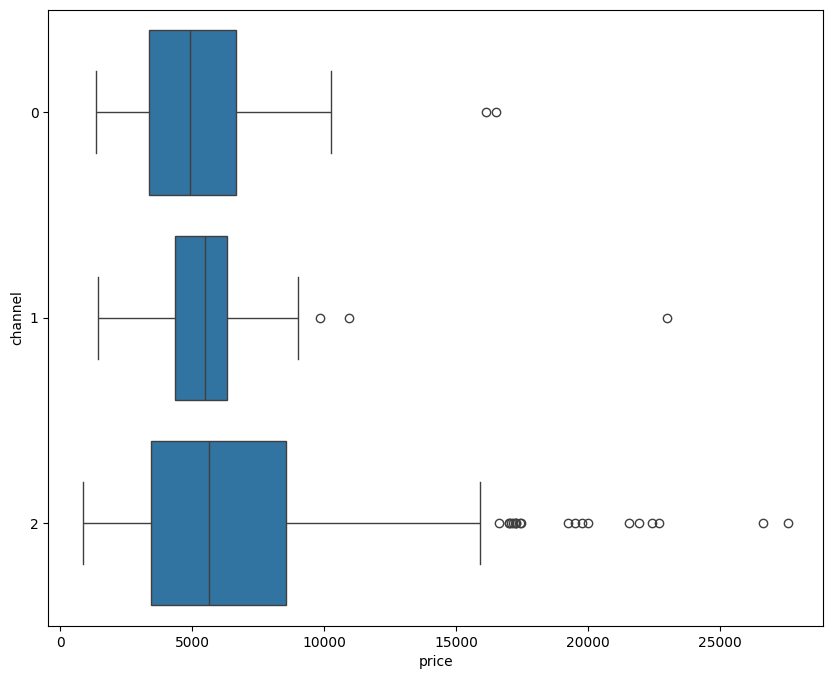

In [25]:
# calling the function for channel
categorical_boxplots(response = 'price',
					 cat_var  = 'channel',
					 data     = diamonds)

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>a) Fill in the blanks in the code below to one hot encode <em>channel</em>.</strong>

In [9]:
help(pd.get_dummies)

Help on function get_dummies in module pandas.core.reshape.encoding:

get_dummies(data, prefix=None, prefix_sep: 'str | Iterable[str] | dict[str, str]' = '_', dummy_na: 'bool' = False, columns=None, sparse: 'bool' = False, drop_first: 'bool' = False, dtype: 'NpDtype | None' = None) -> 'DataFrame'
    Convert categorical variable into dummy/indicator variables.

    Each variable is converted in as many 0/1 variables as there are different
    values. Columns in the output are each named after a value; if the input is
    a DataFrame, the name of the original variable is prepended to the value.

    Parameters
    ----------
    data : array-like, Series, or DataFrame
        Data of which to get dummy indicators.
    prefix : str, list of str, or dict of str, default None
        String to append DataFrame column names.
        Pass a list with length equal to the number of columns
        when calling get_dummies on a DataFrame. Alternatively, `prefix`
        can be a dictionary mapp

<br>

In [32]:
one_hot_channel = pd.get_dummies(
    data = diamonds['channel'],
    prefix = 'channel',
    dtype = int
)

diamonds2 = diamonds.join([one_hot_channel])

diamonds2.head(n = 5)

,carat,color,clarity,cut,channel,store,price,channel_0,channel_1,channel_2
0,0.32,3,7,0,0,7,1375,1,0,0
1,0.35,5,7,1,0,7,1680,1,0,0
2,0.40,4,7,1,0,7,2245,1,0,0
3,0.59,5,7,0,0,3,2495,1,0,0
4,0.72,7,8,0,0,8,2699,1,0,0


In [33]:
# one hot encoding categorical variables
one_hot_channel = pd.get_dummies(data   = diamonds['channel'],
                          prefix = 'channel',
                          dtype  = int)


# joining with rest of dataset
diamonds2 = diamonds.join([one_hot_channel])


# checking results
diamonds2.head(n = 5)

,carat,color,clarity,cut,channel,store,price,channel_0,channel_1,channel_2
0,0.32,3,7,0,0,7,1375,1,0,0
1,0.35,5,7,1,0,7,1680,1,0,0
2,0.40,4,7,1,0,7,2245,1,0,0
3,0.59,5,7,0,0,3,2495,1,0,0
4,0.72,7,8,0,0,8,2699,1,0,0


<br>

In [34]:
# renaming channels and storing as diamonds (not diamonds2)
diamonds2.rename(columns = {'channel_0': 'mall',
                            'channel_1': 'independent',
                            'channel_2': 'internet'},
                inplace = True)


# checking results
diamonds2.head(n = 5)

,carat,color,clarity,cut,channel,store,price,mall,independent,internet
0,0.32,3,7,0,0,7,1375,1,0,0
1,0.35,5,7,1,0,7,1680,1,0,0
2,0.40,4,7,1,0,7,2245,1,0,0
3,0.59,5,7,0,0,3,2495,1,0,0
4,0.72,7,8,0,0,8,2699,1,0,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

Now, we need to decide which category to drop to avoid the <strong>dummy variable trap</strong>. In other words, the sum of all categories will always be one, making them perfectly collinear. Since most linear regression models also include an intercept, this creates a perfect linear relationship that makes the underlying math of models like OLS regression unsolvable.<br><br>
Choosing which category to remove tends to be less mathematical and more application oriented. This is because whatever is removed will act as the basis of interpretation for the categories included in the model. For example, if we remove the independent category, we are effectively setting its coefficient to zero. Thus, we would interpret a model's coefficient for the other channels as:
<br><br>
<div align="center"><h4>"Compared to independent jewelery stores, we can expect a price difference of <em>[coefficient value]</em> for diamonds being sold in <em>[channel]</em>."</h4></div><br>

We tend to use a frequency table (&nbsp;value_counts(&nbsp;)&nbsp;) to help arrive at an appropriate decision on which category to drop.

In [35]:
# analyzing new feature counts
diamonds2[ ['mall', 'independent', 'internet'] ].sum()

,0
mall,43
independent,48
internet,318


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
<strong>b) Complete the code below to drop independent jewelery stores from the dataset.</strong>
Note that we are also dropping <em>channel</em> and <em>store</em> as they are currently not suitable for use in predicitive models.

In [38]:
# dropping features as needed
diamonds = diamonds2.drop(['independent', # category to drop
                           'channel',     # already factorized
                           'store'        # not enough samples per store
                          ], axis = 1)


# checking results
diamonds.head(n = 5)

,carat,color,clarity,cut,price,mall,internet
0,0.32,3,7,0,1375,1,0
1,0.35,5,7,1,1680,1,0
2,0.40,4,7,1,2245,1,0
3,0.59,5,7,0,2495,1,0
4,0.72,7,8,0,2699,1,0


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part II: Training and Testing Sets</h2><br>

<h3>Organizing Data for Model Building</h3><br>
Before building models, we should organize our x-data into feature sets. This way, we can evaluate how different <strong>candidate models</strong> perform in predicting diamond engagement ring prices. Presently, we are focused on ordinary least squares regression. Ideally, we would apply each candidate model to more than model type. However, it's important to make sure we have a solid grasp of the modeling framework presented below before diving into more advanced concepts.

In [39]:
## x-side ##
x_all  = diamonds.drop(labels = 'price', axis = 1)
x_base = diamonds[ ['carat', 'color', 'clarity', 'cut'] ]

## y-side ##
y_original = diamonds['price']

<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>
Below we are selecting which feature sets to use. Notice that we do this for both the x- and y-sides of our model. Currently, we only have one version of the y-variable, but this will change as we advance in our modeling kowledge.
<br><br>
<strong>a) Complete the code below using <em>x_all</em>.</strong>

In [43]:
# x-data
x_data = x_base

# y_data
y_data = y_original

# train-test split
x_train, x_test, y_train, y_test = train_test_split(x_data,
                                                    y_data,
                                                    test_size    = 0.35,
                                                    random_state = 702 )

<br>

In [46]:
# checking results
print(f"""
Data Shapes
-----------
x_train: {x_train.shape}
y_train: {y_train.shape}

x_test:  {x_test.shape}
y_test:  {y_test.shape}
""")


Data Shapes
-----------
x_train: (265, 4)
y_train: (265,)

x_test:  (144, 4)
y_test:  (144,)



<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part III: Linear Regression Modeling</h2>

* We always build on the training set.
* We never touch the testing set.

In [49]:
# naming the model
model_name = "Linear Regression"


# INSTANTIATING model object
model = sklearn.linear_model.LinearRegression()


# FITTING to training data
model_fit = model.fit(x_train, y_train)


# PREDICTING on new data
model_pred = model.predict(x_test)


# SCORING results (R-Square)
model_train_score = round(model.score(x_train, y_train), ndigits = 4)
model_test_score  = round(model.score(x_test, y_test), ndigits = 4)
model_gap         = round(model_train_score - model_test_score, ndigits = 4)


# displaying results
print('Training Score :', model_train_score)
print('Testing Score  :', model_test_score)
print('Train-Test Gap :', model_gap)

Training Score : 0.8706
Testing Score  : 0.8422
Train-Test Gap : 0.0284


<br>
<h3>Extracting Coefficients</h3>

In [50]:
# zipping each feature name to its coefficient
model_coefficients = zip(x_train.columns,
                         model.coef_.round(decimals = 4))


# setting up a placeholder list to store model features
coefficient_lst = [('intercept', model.intercept_.round(decimals = 4))]


# printing out each feature-coefficient pair one by one
for coefficient in model_coefficients:
    coefficient_lst.append(coefficient)


# checking the results
for pair in coefficient_lst:
    print(pair)

('intercept', np.float64(563.2363))
('carat', np.float64(10112.355))
('color', np.float64(-566.526))
('clarity', np.float64(-515.0528))
('cut', np.float64(492.7316))


<br>
<h3>Model Summary</h3>

In [51]:
# dynamically printing model summary
ols_model =  f"""\
Model Name:     {model_name}
Train_Score:    {model_train_score}
Test_Score:     {model_test_score}
Train-Test Gap: {model_gap}

Coefficents
-----------
{pd.DataFrame(data = coefficient_lst, columns = ["Feature", "Coefficient"])}"""

print(ols_model)

Model Name:     Linear Regression
Train_Score:    0.8706
Test_Score:     0.8422
Train-Test Gap: 0.0284

Coefficents
-----------
     Feature  Coefficient
0  intercept     563.2363
1      carat   10112.3550
2      color    -566.5260
3    clarity    -515.0528
4        cut     492.7316


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<strong>How fit should a model be?</strong><br>
As a general heuristic, if the training and testing scores are within 0.05 of each other, the model has not been overfit. Don't worry if the testing score ends up higher than the training score. Some sources claim that in such situations a model is underfit, but this is a general misconception that is beyond the scope of this course.<br><br>

<h2>Exploring the Model Building Framework</h2><br>
Let's explore each component of the model building framework.

In [52]:
help(sklearn.linear_model.LinearRegression)

Help on class LinearRegression in module sklearn.linear_model._base:

class LinearRegression(sklearn.base.MultiOutputMixin, sklearn.base.RegressorMixin, LinearModel)
 |  LinearRegression(*, fit_intercept=True, copy_X=True, n_jobs=None, positive=False)
 |
 |  Ordinary least squares Linear Regression.
 |
 |  LinearRegression fits a linear model with coefficients w = (w1, ..., wp)
 |  to minimize the residual sum of squares between the observed targets in
 |  the dataset, and the targets predicted by the linear approximation.
 |
 |  Parameters
 |  ----------
 |  fit_intercept : bool, default=True
 |      Whether to calculate the intercept for this model. If set
 |      to False, no intercept will be used in calculations
 |      (i.e. data is expected to be centered).
 |
 |  copy_X : bool, default=True
 |      If True, X will be copied; else, it may be overwritten.
 |
 |  n_jobs : int, default=None
 |      The number of jobs to use for the computation. This will only provide
 |      speedu

<br>
<h3>Instantiate</h3>
This creates a blueprint of the model, just like with user-defined functions.

In [53]:
# this is a blueprint
model = sklearn.linear_model.LinearRegression()


# printing blueprint
print(model)

LinearRegression()


<br><h3>Fit</h3>
Runs the data through the model, creating regression metrics such as R-Square and coefficients.

In [57]:
# model is created from blueprint and data
model_fit = model.fit(x_train, y_train)


# printing model attributes
print(f"""
Intercept
---------
{round(model_fit.intercept_, ndigits = 2)}


Coefficients
------------
{model_fit.coef_.round(decimals = 2)}


Total X-Features
----------------
{model_fit.n_features_in_}
""")


Intercept
---------
563.24


Coefficients
------------
[10112.36  -566.53  -515.05   492.73]


Total X-Features
----------------
4



<br><h3>Predict</h3>
Uses the fitted model to predict on the testing set. This helps us understand the stability of the model.

In [58]:
# applying model to validation set
model_pred = model.predict(x_test)


# printing predictions (validation set)
print(model_pred.round(decimals = 0).astype(dtype = int))

[ -671 12052  3359  2263  6520 12325  5602  6683  8380  5350  1829  3721
  4485 12862  5510  4388  2831  5418  5346  7833  4676  5367  2919  7762
 15329  4337  4984  9076 15156  7513 12449  6654  4945 10820   280  3842
  9433 15306  1285  5942  5874  6998  7833  5014 10817  5510  4753  2141
  4011  7571  5167  5016  3882  4052  4881  4854  6443  5047 12052  3671
  3934  2993  6706  5623 -1506  6168  3891 16411 11303  8988  7431  5346
 16592  5664  3001  4337  4081 10221 11354   624 -1843  6908  7231 18161
  2680  5054  -242 10079 12787 18110 12538 12871  1973   158  5267  5942
  2012  6996 15481  5841  2707  4043 10820   471  4114  6825 10817  6601
  5056  3928  2919  3955  7431  3586 15481 10528  2465  8369   325   681
  3959 14340  4753  9229  9393  3748  2677  5308  2133  2698    92  6443
  7573  6964  -358 10940  2284  5825  2102  5977  1415  2160  6908  4366]


<br>

In [59]:
## Residual Analysis ##

# organizing residuals
model_residuals = {
    "True"            : y_test,
    "Predicted"       : model_pred.round(decimals = 0).astype(dtype = int)
}


# converting residuals into df
resid_df = pd.DataFrame(data = model_residuals)


# checking results
resid_df.head(n = 5)

,True,Predicted
91,878,-671
374,11910,12052
72,5895,3359
32,6685,2263
89,10950,6520


<br><br>
<strong>a)</strong> Complete the code to develop a residual plot from <em>resid_df</em>. Plot <em>Predicted</em> on the x-axis and <em>True</em> on the y-axis.

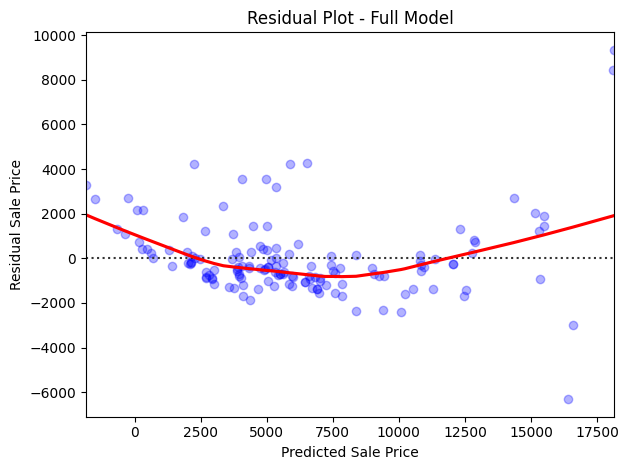

In [61]:
# developing a residual plot
sns.residplot(x           = resid_df['Predicted'],
              y           = resid_df['True'] - resid_df['Predicted'],
              lowess      = True,
              color       = 'blue',
              scatter_kws = {'alpha': 0.3},   # data point transparency
              line_kws    = {'color': 'red'}) # line color


# title and axis labels
plt.title(label   = "Residual Plot - Full Model")
plt.xlabel(xlabel = "Predicted Sale Price")
plt.ylabel(ylabel = "Residual Sale Price")


# layout and rendering visual
plt.tight_layout()
plt.show()

<br>
<h3>Score</h3>
Quantifies the quality of predictions based on a scoring metric (in this case, R-Square). More information on scoring metrics <a href="https://scikit-learn.org/stable/modules/model_evaluation.html">can be found here</a>.

In [62]:
# checking overall predictive quality
print('Training Score:', round(model.score(x_train, y_train), ndigits = 4))
print('Testing  Score:', round(model.score(x_test, y_test),   ndigits = 4))
print('Train-Test Gap:', model_gap)

Training Score: 0.8706
Testing  Score: 0.8422
Train-Test Gap: 0.0284


<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Part IV: Practice Time!</h2><br>
Run this script again using different sets of X-data.<br>

* Which feature set results in the highest R-Square value?
* Which one results in the lowest train-test gap?
* Are there any feature sets that flatten out the lowess estimator in the residual plot?

<br><br><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

~~~

  _    _                           __  __           _      _ _             _
 | |  | |                         |  \/  |         | |    | (_)           | |
 | |__| | __ _ _ __  _ __  _   _  | \  / | ___   __| | ___| |_ _ __   __ _| |
 |  __  |/ _` | '_ \| '_ \| | | | | |\/| |/ _ \ / _` |/ _ \ | | '_ \ / _` | |
 | |  | | (_| | |_) | |_) | |_| | | |  | | (_) | (_| |  __/ | | | | | (_| |_|
 |_|  |_|\__,_| .__/| .__/ \__, | |_|  |_|\___/ \__,_|\___|_|_|_| |_|\__, (_)
              | |   | |     __/ |                                     __/ |  
              |_|   |_|    |___/                                     |___/   
                                                                 
~~~

<br>
<hr style="height:.9px;border:none;color:#333;background-color:#333;" />
<hr style="height:.9px;border:none;color:#333;background-color:#333;" /><br>

<h2>Bonus I: Using Statsmodels for p-values</h2>

Although p-values are not a concept in scikit-learn, we can apply our knowledge of statsmodels to generate them. Note that p-values are only applicable to a small handful of models. For our purposes, they may come in handy for OLS regression. Run the code below if you would like to generate an output that includes p-values for all features.

In [ ]:
# Step 1: INSTANTIATE a model object
lm = smf.ols(formula =  """price ~ carat +
                                   color +
                                   clarity +
                                   cut +
                                   mall +
                                   internet""",
            data = diamonds)


# Step 2: FIT the data into the model object
results = lm.fit()


# Step 3: analyze the SUMMARY output
print(results.summary())

<br>
<h2>Bonus II: Saving the Dataset to Excel</h2>

Run the following code to learn about the <em>to_excel(&nbsp;)</em> method. Then, save the prepared dataset as an Excel file.

In [ ]:
help(diamonds.to_excel)

<br>

In [ ]:
# storing the dataset as an Excel file
diamonds.to_excel(excel_writer = './datasets/diamonds_prepped.xlsx',
                  index = False)

<br>